### Problem Statement

1.	For the given dataset, perform the tasks below and write your observations

a.	PimaIndianDiabetes.csv

b.	Perform EDA

c.	Build a decision tree classifier

d.	Compare the accuracy scores with gini index and entropy

e.	Evaluate the performance and explain the metrics


In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import Series

In [110]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Importing Dataset 
a. Diabetes.csv

In [111]:
data = pd.read_csv("diabetes.csv")
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### b. Perform EDA

In [112]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [113]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [115]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [116]:
data.Outcome.unique()

array([1, 0], dtype=int64)

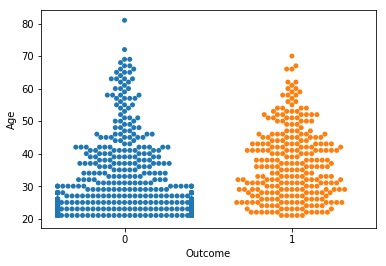

In [133]:
sns.swarmplot(x=data.Outcome,y=data.Age,data=data)
plt.show()

In [117]:
### Model building - Split dataset into features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

In [118]:
### Model building - Split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

### Building Decision Tree Classifier

#### Using GINI index which is the default criterion of this classifier

In [119]:
clf = DecisionTreeClassifier(random_state=0,max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [120]:
y_pred = clf.predict(X_test)

In [121]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


In [122]:
# When max depth is 3
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.645021645021645


In [123]:
# When max depth is 1
clf = DecisionTreeClassifier(random_state=0,max_depth=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6796536796536796


#### Using Entropy criterion

In [124]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=2,random_state=0)
clf1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [125]:
clf1 = clf1.fit(X_train,y_train)

In [126]:
y_pred1 = clf1.predict(X_test)

In [127]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.7012987012987013


In [130]:
# when max depth is 3
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=3,random_state=0)

clf2 = clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.696969696969697


In [131]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=1,random_state=0)


clf3 = clf3.fit(X_train,y_train)

y_pred3 = clf3.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.6796536796536796


### Inferences

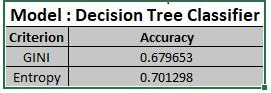

* From the above table it is inferred that, the classification accuracy percentage has increased from 68 % to 70% when using the entropy criterion. 
    Using Entropy criterion gives the better model


* Variations in max depth : 

    While using GINI index, setting max depth to  3 gives a comparitively lower accuracy. Max depth set as 1 or 2 gives the same accuracy ie.on incrementing the max depth above 2 give lower accuracy.
    
    Similarly, while using Entropy criterion, setting max depth as 2 gives better accuracy. Setting it lower than 2 or greater than 2 (in both cases), the accuracy falls down. 
    
    Thus, the ideal max depth is 2 and ideal criterion is ENTROPY . This value builds the better model.
